<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Practica_23_RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Jose Daniel Isidoro Reyes
*   Matrícula: 261552

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [13]:
# Escribe tu código aquí

from google.colab import drive
drive.mount('/content/drive')
print("\n")

# 1. importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# 2. Carga de dataset
df =  pd.read_csv('/content/drive/MyDrive/Programación Analítica Predictiva/restaurantes.csv')

# 3. Impresión de primeras filas del dataframe
print(df.head())
print("\n")

# 4. Descripción estadística del conjunto de datos
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233




,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<p align = "justify"


Se puede observar que el conjunto de datos consta de 97 filas y 2 columnas. No hay información adicional que permita conocer el contexto de los datos, sin embargo, se puede inferir que posiblemente haga referencia a restaurantes por ciudades. Por otra parte, se observa que la variable poblation exhibe sesgo positivo ya que el promedio es mayor a la mediana, al igual que profit.

##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

Text(0.5, 1.0, 'Relación entre Población y Beneficios')

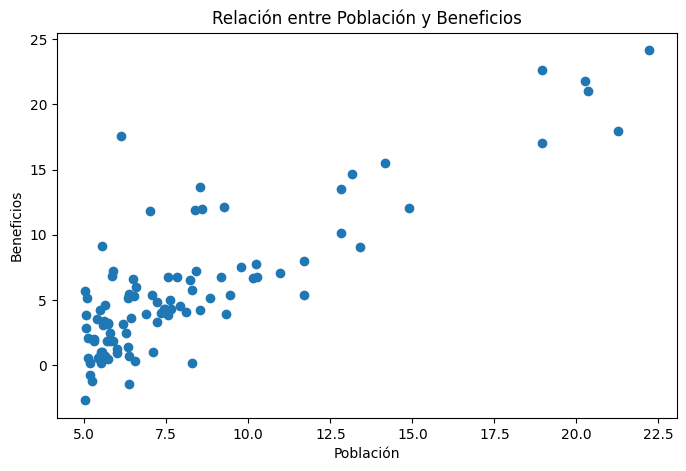

In [14]:
# Diagrama de dispersión
plt.figure(figsize = (8, 5)  )
plt.scatter(x =  'poblation', y = 'profit', data = df)
plt.xlabel('Población')
plt.ylabel('Beneficios')
plt.title('Relación entre Población y Beneficios')

<p style="text-align: justify">

El gráfico de dispersión muestra claramente una relación lineal positiva entre la población de la ciudad y los beneficios de los restaurantes. Se observa que a medida que la población aumenta, los beneficios de los restaurantes tambien aumentan.

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

In [15]:
# Cálculo de correlación
correlación =  df['poblation'].corr(df['profit'])

# Impresión del coeficiente de correlación
print(f"El coeficiente de correlación entre población y beneficios es: {correlación	}")

El coeficiente de correlación entre población y beneficios es: 0.837873232526341


<p align =  "justify"

Se observa que la correlación entre población y beneficios es positiva (0.83), la cual se puede considerar fuerte dado que es mayor a 0.75. Lo anterior, hace total sentido con el gráfico de dispersión entre población y beneficios, es decir, cuando la población aumenta los beneficios tambien aumentan.

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [16]:
# Construcción del modelo  y Coeficientes del modelo

# 1. Contrucción del modelo de regresión lineal simple
X =  df[['poblation']]
y = df['profit']

# Selección de modelo lineal
model  =  sklearn.linear_model.LinearRegression()

# Entrenamiento del modelo
model.fit(X, y)


# 2. Impresión del intercepto y pendiente del modelo
intercepto  =  model.intercept_
pendiente =  model.coef_[0]

print(f"El intercepto del modelo es: {intercepto}\n")
print(f"La pendiente del modelo es: {pendiente}")

El intercepto del modelo es: -3.8957808783118484

La pendiente del modelo es: 1.1930336441895932


<p align = "justify"


- Como se puede observar el  **intercepto es negativo**. Este nos indica el valor de los beneficios cuando la población de la ciudad es 0. El hecho de que el intercepto sea negativo puede deberse a que no hay suficientes observaciones con población alrededor de 0. Otra posible interpretación del intercepto es que representa los costos fijos del restaurante antes de que llegué el primer cliente.

<p align = "Justify"

- Por otro lado, el valor del **coeficiente** es aproximadamente  1.19, el cual indica que por cada aumento de una unidad de la población se espera un incremento en promedio de 1.19 unidades en los beneficios.

### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

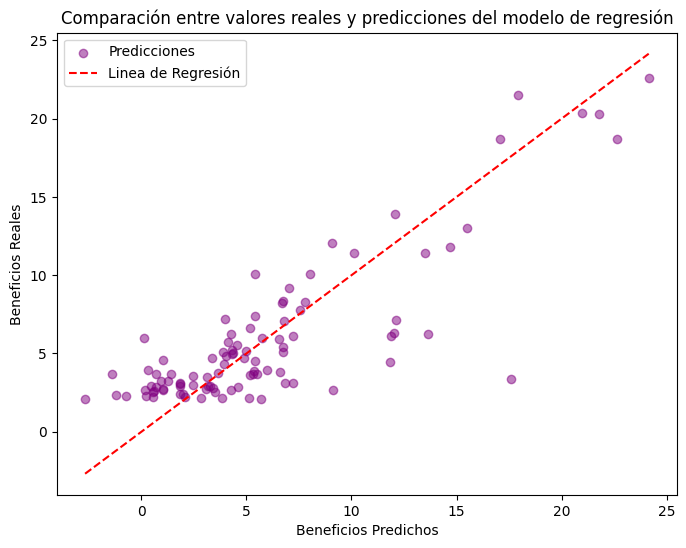

In [17]:
# Obtención de las prediciones
y_pred  =  model.predict(X)

# Visualiación de la regresión ajustada
plt.figure(figsize =  (8, 6))
plt.scatter(y, y_pred, color  = "purple", label  = "Predicciones", alpha  =  0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color  = "red", linestyle  = "--", label = "Linea de Regresión")
plt.title("Comparación entre valores reales y predicciones del modelo de regresión")
plt.ylabel("Beneficios Reales")
plt.xlabel("Beneficios Predichos")
plt.legend()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

Text(0.5, 0, 'Residuos (Valor Real - Valor Predicho)')

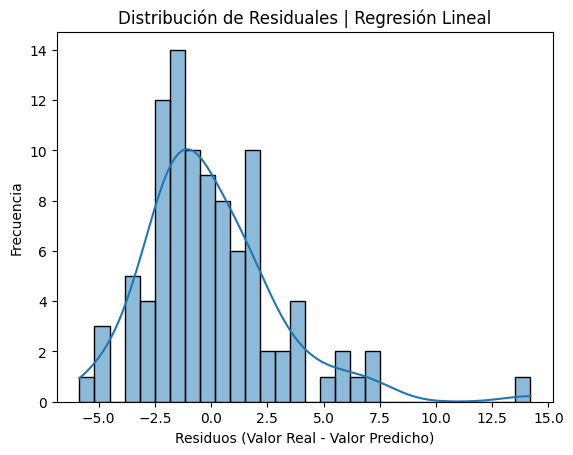

In [18]:
# Normalidad de los residuos

# Calculo de los residuso del modelo
residuos =  y - y_pred

# Histograma de los residuos
sns.histplot(residuos, kde =  True, bins  =  30)
plt.title('Distribución de Residuales | Regresión Lineal')
plt.ylabel("Frecuencia")
plt.xlabel('Residuos (Valor Real - Valor Predicho)')

<p align =  "Justify"

Como se puede observar del gráfico anterior, los residuos no tienen un compartamiento normal. De hecho, se observa que los residuos aumentan para valores mayores de población. Esto es complementado por el análisis de dispersión hecho anteriormente, ya que era posible observar mayor dispersión a medida que aumenta la población.

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

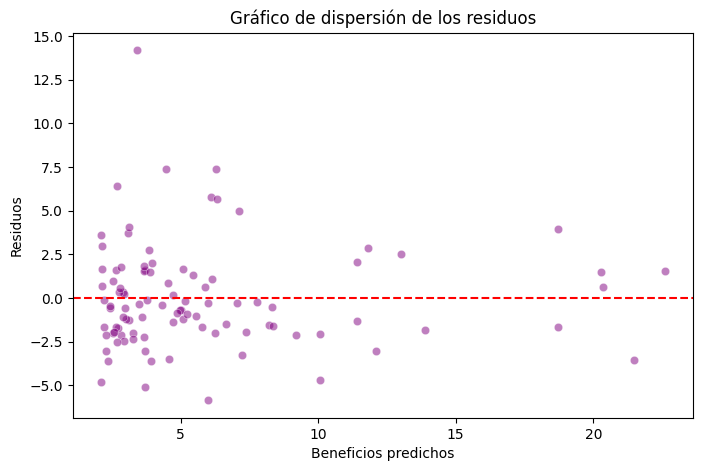

In [19]:
# Gráfico de residuos vs predicho
plt.figure(figsize =  (8, 5))
sns.scatterplot(x =  y_pred, y =  residuos, alpha  =  0.5, color  = "purple")
plt.axhline(y = 0, color  = 'r', linestyle  =  "--")
plt.xlabel('Beneficios predichos')
plt.ylabel('Residuos')
plt.title("Gráfico de dispersión de los residuos")
plt.show()

<p align =  "Justify"

El gráfico anterior sugiere que los errores no son ruido blanco. Por ejemplo, para beneficios menores a 10, se observa mayor dispersión de los residuos, en contraste, para valores mayores a 10 se observa que los errores se concentran alrededor de 0. Por otra parte, una prueba estadística es lo más adecuado para probar la existencia de heterocedasticidad (varianza no constante).

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

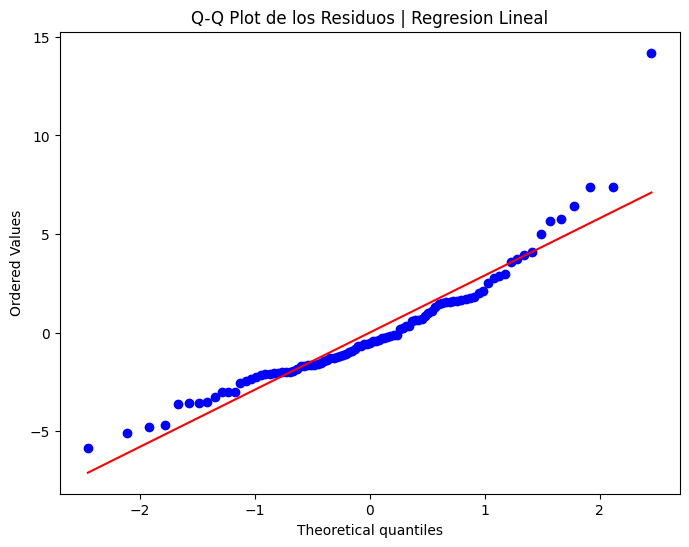

In [20]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuos | Regresion Lineal')
plt.show()


El gráfico QQ  sugiere la presencia de colas pesadas ya que se observan desviaciones de los residuales respecto a lo que se esperaría de una distribución normal. Este problema posiblemente pueda ser tratado a través del tratamiento de valores atípicos.

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [21]:
# Evaluación del modelo
mse =  mean_squared_error(y, y_pred) # Error Cuadrático Medio
rmse =  np.sqrt(mse) # Raíz del error cuadrático medio
r2 =  r2_score(y, y_pred)

# Impresión de las métricas del modelo
print(f"Error cuadrático (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático (MSE): 8.9539
Raíz del Error Cuadrático Medio (RMSE): 2.9923
Coeficiente de determinación (R²): 0.7020


<p align =  "Justify"

El error cuadrático medio es aproximadamente 8.95, el cual carece de interpretación a menos que se compare con otros modelos. Por otra parte, el error cuádrico medio indica que el modelo tiene en promedio un error de 2.99 unidades respecto al verdadero valor de los beneficios. El coeficiente de determinación indica un buen ajuste, ya que indica que el modelo es capaz de explicar alrededor del 70% de las variaciones de los beneficios respecto a su media. Este valor se considera alto considerando la naturaleza de datos de corte transversal.

In [22]:
#P-values
X_constante =  sm.add_constant(X)

# Ajuste del modelo de regresión con statsmodels
model_sm =  sm.OLS(y, X_constante).fit()

# Impresión del resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           1.02e-26
Time:                        21:43:51   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.0

## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
<p align  =  "Justify"

El modelo es bastante últil para comprender el efecto de la población sobre los beneficios el modelo es capaz de explicar aproximadamente el 70% de las variaciones de los beneficios respecto a su media. De igual manera, el modelo es estadísticamente significativo en su conjunto.

- ¿Qué limitaciones encuentras?

Los graficos de dispersión y QQ de los residuales sugieren que se viola el supuesto de normalidad. Adicionalmente los valores Prob(Omnibus) y Prob(JB) confirman que existe evidencia suficiente para rechazar la hipótesis nula de normalidad. Este problema provoca que pruebas de hipótesis e intervalos de confianzas sean erroneos.

Otro gran problem presente es la autocorrelación entre los residuales, ya que el valor 0.994 indicando la presencia de autocorrelación positiva provocando que los errores estándar sean subestimados lo que da lugar estadísticos t inflados.


- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

Para fines ilustrativos, se intenta abordar el problema con transformación Box-Cox como se muestra a continuación:

### Aplicación de Transformación Box-Cox

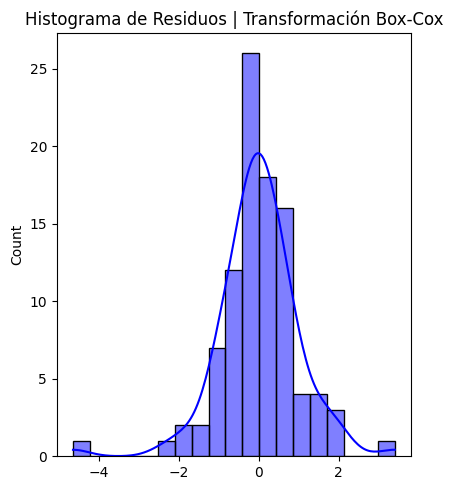

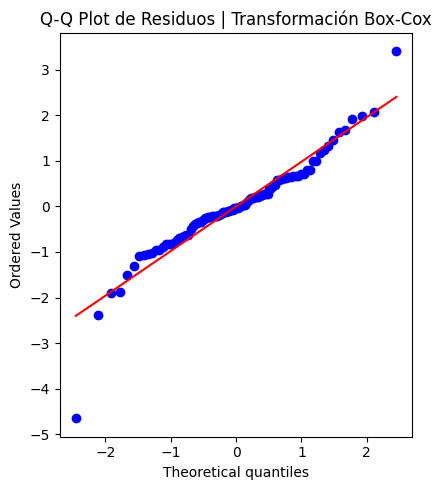

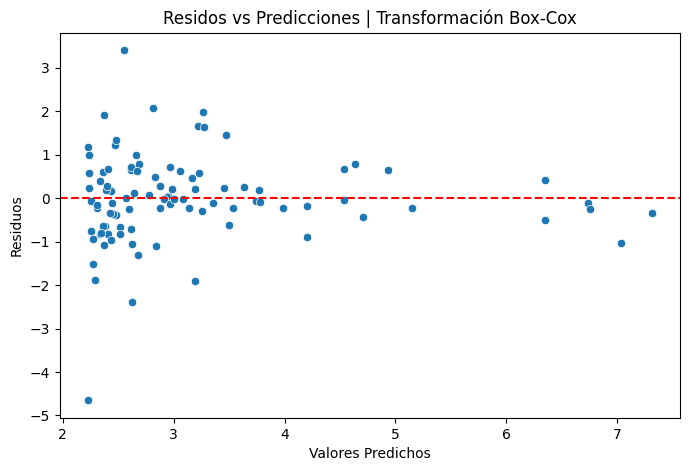

In [26]:
# Creación de constante de desplazamiento para evitar valores negativos
k  =  abs(y.min()) + 1e-6
y_shifted =  y +  k

# Aplicación de Transformación Box-Cox
y_boxcox, lambda_opt  = stats.boxcox(y_shifted)

# Construcción de modelo con tranformación de datos
regresion_bc =  sklearn.linear_model.LinearRegression()
regresion_bc.fit(X, y_boxcox)

# Predicciones del modelo
y_pred_bc =  regresion_bc.predict(X)
residuos_bc =  y_boxcox - y_pred_bc

plt.figure(figsize =  (8, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuos_bc, kde =  True, color  = "blue")
plt.title("Histograma de Residuos | Transformación Box-Cox")
plt.tight_layout()
plt.show()

plt.figure(figsize =  (8, 5))
plt.subplot(1, 2, 2)
stats.probplot(residuos_bc, dist = "norm", plot  = plt)
plt.title("Q-Q Plot de Residuos | Transformación Box-Cox")
plt.tight_layout()
plt.show()

plt.figure(figsize =  (8, 5))
sns.scatterplot(x =  y_pred_bc, y =  residuos_bc)
plt.axhline(0, color  =  "red", linestyle  =  "--")
plt.title("Residos vs Predicciones | Transformación Box-Cox")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.show()

<P align =  "Justify"

El histograma del modelo con datos transformados muestra que se ha corregido con éxito el sesgo positivo de los residuales. Sin embargo, el gráfico de QQ sugiere que el problema no solo debe a la distribución de los datos, sino tambien a la presencia de valores atípicos. Otra estrategia podría consistir en tratar tratar los valores atípicos usando Winsorización dado que tenemos pocos, así como estimar residuos robustos.

<p align =  "Justify"

Por otra parte, queda pendiente el problema de autocorrelación de residuales,  el cual puede necesitar otra estrategía de modelización como Mínimos Cuadrados Generalizados o Series Temporales. Estos problemas se dejan para futuros trabajos dado que requieren mayor tiempo para su resolución.